Linear Predictive Coding and Linear Predictive Cepstral Coefficients
# <span style="color:red"> ***** </span><span style="color:blue"> Linear Predictive Coding and Linear Predictive Cepstral Coefficients</span> <span style="color:green"> ***** </span>

Librosa does not have a direct implementation of Linear Predictive Cepstral Coefficients (LPCC). However, we can compute LPCC using a combination of Librosa's LPC function and additional processing.

To calculate LPCC using Librosa:

    Use librosa.lpc() to compute Linear Predictive Coding (LPC) coefficients.
    
    Convert the LPC coefficients to Linear Predictive Cepstral Coefficients (LPCC).

The librosa.lpc() function implements Linear Predictive Coding using Burg's method, which is an extension of the Yule-Walker approach12. This method effectively performs the following steps:

Pre-processing: The input signal y is assumed to be pre-processed.

Autocorrelation: Burg's method implicitly calculates autocorrelation.

LPC Analysis: The function computes LPC coefficients using Burg's algorithm.

Feature Vector Formation: The function returns the LPC coefficients as a feature vector.

The librosa.lpc() function takes two main parameters:
    y: The time series to fit (audio signal)

    order: The order of the linear filter (number of LPC coefficients)

The function returns an array of LPC coefficients, which represent the filter denominator polynomial. These coefficients can be used for various speech analysis and synthesis tasks, including spectral envelope estimation and speech coding.
It's worth noting that while the librosa implementation handles the core LPC computation, additional steps like windowing or conversion to other representations (e.g., cepstral coefficients) may need to be performed separately if required for specific applications.


Linear Predictive Coding (LPC) coefficients

# <span style="color:red"> ***** </span><span style="color:blue"> Project Data File Folder</span> <span style="color:green"> ***** </span>

In [1]:
import sys, os
parent_dir = os.path.dirname(os.path.realpath('/Users/akpy27/Downloads/Untiltled'))

# To get one directory up from the current file
project_dir = os.path.abspath(os.path.join(parent_dir, "./Untitled/"))

sys.path.insert(0,project_dir)

print ('Parent Directory Path:', parent_dir)
print ('Project Path:', project_dir)

Parent Directory Path: /Users/akpy27/Downloads
Project Path: /Users/akpy27/Downloads/Untitled


In [2]:
import librosa # type: ignore
import torchaudio
import numpy as np
from glob import glob
from tqdm import tqdm
import soundfile as sf
import noisereduce as nr

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# <span style="color:red"> ***** </span><span style="color:blue"> LPC Feature Extraction</span> <span style="color:green"> ***** </span>

In [3]:


# Load the audio file and extract LPC features


def extract_feature(audio_file, order=26, preprocess=False, noise=False):

  '''
  Function to extract features from a single audio file given its path
  Modify this function to extract your own custom features
  '''

  audio,fs = torchaudio.load(audio_file)
  audio = audio.numpy().reshape(-1)

  if preprocess:
    #write code to do preprocessing - scipy, librosa
    audio = librosa.resample(audio, orig_sr=44100, target_sr=16000)
  
  if noise:
    y_preemphasized = librosa.effects.preemphasis(y=audio)
    #reduced_noise = nr.reduce_noise(y_preemphasized,sr=fs)
    lpc_features = librosa.lpc(y_preemphasized,  order=order)
  else:
    lpc_features = librosa.lpc(audio, order=order)
  
  delta1 = lpc_features[:-1] - lpc_features[1:]
  delta2 = lpc_features[:-1] - lpc_features[1:]

  lpcs = np.concatenate((lpc_features, delta1, delta2))
 
  return lpcs

def get_label(file_name):
  '''
  Function to retrieve output labels from filenames
  '''
  if 'ROC' in file_name:
    label=0
  elif 'LES' in file_name:
    label=1
  elif 'DCB' in file_name:
    label=2
  elif 'PRV' in file_name:
    label=3
  elif 'VLD' in file_name:
    label=4
  elif 'DTA' in file_name:
    label=5
  else:
    raise ValueError('invalid file name')
  return label

# <span style="color:red"> ***** </span><span style="color:blue"> Train and Test Data Preparation</span> <span style="color:green"> ***** </span>

In [4]:
#First we obtain the list of all files in the train directory
train_files = glob(project_dir + "/project_data/train/*.wav")

#Let's sort it so that we're all using the same file list order
#and you can continue processing the features from a given file if it stops
#partway through running
train_files.sort()

train_feat=[]
train_label=[]

for wav in tqdm(train_files):
  train_feat.append(extract_feature(wav))
  train_label.append(get_label(wav))

  6%|▌         | 548/8980 [00:10<02:01, 69.31it/s]/var/folders/x0/7rm17_jj4pl_hzypv_5nm6sm0000gn/T/ipykernel_15092/3524857084.py:25: RuntimeWarning: invalid value encountered in subtract
  delta1 = lpc_features[:-1] - lpc_features[1:]
/var/folders/x0/7rm17_jj4pl_hzypv_5nm6sm0000gn/T/ipykernel_15092/3524857084.py:26: RuntimeWarning: invalid value encountered in subtract
  delta2 = lpc_features[:-1] - lpc_features[1:]
100%|██████████| 8980/8980 [02:23<00:00, 62.41it/s] 


In [5]:
#Now we obtain the list of all files in the test_clean directory
test_clean_files = glob(project_dir + '/project_data/test_clean/*.wav')

#Similar to above, we sort the files
test_clean_files.sort()

test_clean_feat=[]
test_clean_label=[]

for wav in tqdm(test_clean_files):

  test_clean_feat.append(extract_feature(wav))
  test_clean_label.append(get_label(wav))

  6%|▌         | 144/2533 [00:02<00:46, 51.90it/s]/var/folders/x0/7rm17_jj4pl_hzypv_5nm6sm0000gn/T/ipykernel_15092/3524857084.py:25: RuntimeWarning: invalid value encountered in subtract
  delta1 = lpc_features[:-1] - lpc_features[1:]
/var/folders/x0/7rm17_jj4pl_hzypv_5nm6sm0000gn/T/ipykernel_15092/3524857084.py:26: RuntimeWarning: invalid value encountered in subtract
  delta2 = lpc_features[:-1] - lpc_features[1:]
100%|██████████| 2533/2533 [00:40<00:00, 62.95it/s]


In [6]:
#Finally we obtain the list of all files in the test_noisy directory
test_noisy_files = glob(project_dir + '/project_data/test_noisy/*.wav')

#Similar to above, we sort the files
test_noisy_files.sort()

test_noisy_feat=[]
test_noisy_label=[]

for wav in tqdm(test_noisy_files):
  test_noisy_feat.append(extract_feature(wav))
  test_noisy_label.append(get_label(wav))

  0%|          | 0/3238 [00:00<?, ?it/s]

 36%|███▌      | 1162/3238 [00:18<00:29, 69.62it/s]/var/folders/x0/7rm17_jj4pl_hzypv_5nm6sm0000gn/T/ipykernel_15092/3524857084.py:25: RuntimeWarning: invalid value encountered in subtract
  delta1 = lpc_features[:-1] - lpc_features[1:]
/var/folders/x0/7rm17_jj4pl_hzypv_5nm6sm0000gn/T/ipykernel_15092/3524857084.py:26: RuntimeWarning: invalid value encountered in subtract
  delta2 = lpc_features[:-1] - lpc_features[1:]
100%|██████████| 3238/3238 [00:50<00:00, 64.33it/s]


# <span style="color:red"> ***** </span><span style="color:blue"> Model Training and Predictions</span> <span style="color:green"> ***** </span>

In [7]:
import xgboost
import numpy as np
import shap
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Format input data

#Edit this variable to create a list that contains your feature names
feat_names=['LPC_' +str(n) for n in range(len(train_feat[0]))]

train_feat_df = pd.DataFrame(data=np.stack(train_feat), columns=feat_names)
y_train=np.stack(train_label)


test_clean_feat_df = pd.DataFrame(data=np.stack(test_clean_feat), columns=feat_names)
y_test_clean=np.stack(test_clean_label)


test_noisy_feat_df = pd.DataFrame(data=np.stack(test_noisy_feat), columns=feat_names)
y_test_noisy=np.stack(test_noisy_label)

# Replace NaN with the mean of the column
train_feat_df.fillna(train_feat_df.mean(), inplace=True)

# Replace infinite values with a large finite number
train_feat_df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

# Replace NaN with the mean of the column
test_clean_feat_df.fillna(test_clean_feat_df.mean(), inplace=True)

# Replace infinite values with a large finite number
test_clean_feat_df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

# Replace NaN with the mean of the column
test_noisy_feat_df.fillna(test_noisy_feat_df.mean(), inplace=True)

# Replace infinite values with a large finite number
test_noisy_feat_df.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

#you could just pass in the matrix of features to xgboost
#but it looks prettier in the shap explainer if you format it
#as a dataframe.


model = xgboost.XGBClassifier()
model.fit(train_feat_df,y_train)

print("Train Clean Acc =", np.sum(y_train==model.predict(train_feat_df))/len(y_train))

print("Test Clean Acc =", np.sum(y_test_clean==model.predict(test_clean_feat_df))/len(y_test_clean))

print("Test Noisy Acc =", np.sum(y_test_noisy==model.predict(test_noisy_feat_df))/len(y_test_noisy))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Train Clean Acc = 0.9914253897550112
Test Clean Acc = 0.6091590998815634
Test Noisy Acc = 0.6618282890673255


# <span style="color:red"> ***** </span><span style="color:blue"> Interpreting Results and Explainability</span> <span style="color:green"> ***** </span>

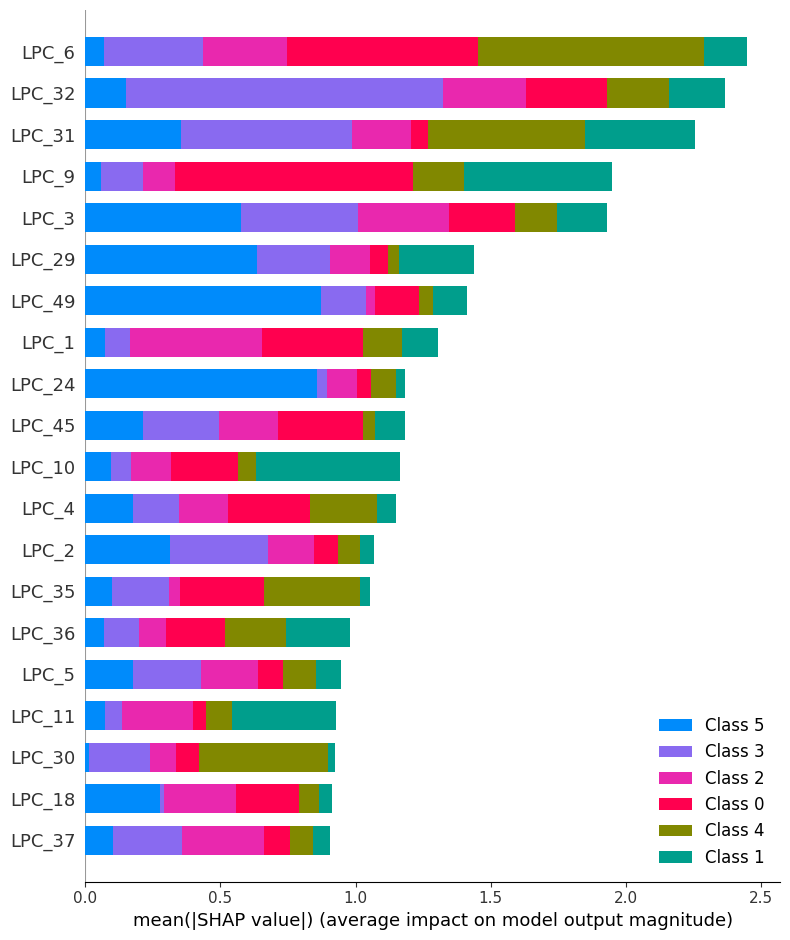

In [8]:
import shap

# Explain the model's predictions using SHAP by computing SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(train_feat_df)

#Convert the shap values for each class to a single list
shap_as_list=[]
for i in range(6):
    shap_as_list.append(shap_values[:,:,i])

# Plot the SHAP values
shap.summary_plot(shap_as_list, train_feat_df, plot_type="bar")

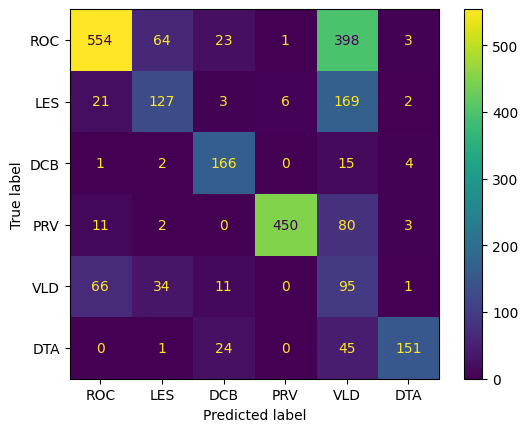

In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix_clean = metrics.confusion_matrix(y_test_clean, model.predict(test_clean_feat_df))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_clean, display_labels = ['ROC','LES','DCB','PRV','VLD', 'DTA'])
cm_display.plot()
plt.show()

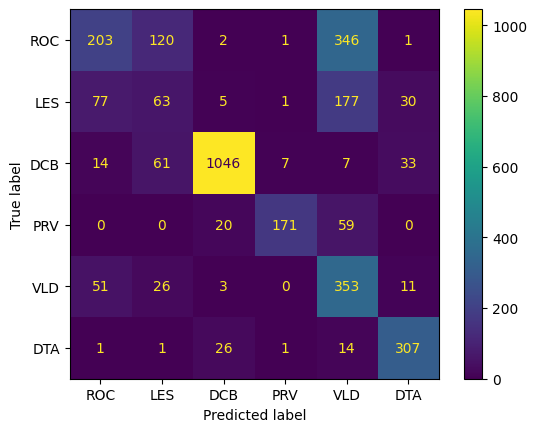

In [10]:
confusion_matrix_noisy = metrics.confusion_matrix(y_test_noisy, model.predict(test_noisy_feat_df))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_noisy, display_labels = ['ROC','LES','DCB','PRV','VLD', 'DTA'])
cm_display.plot()
plt.show()


# <span style="color:red"> ***** </span><span style="color:blue"> Linear Predictive Cepstral Coefficients (LPCC)</span> <span style="color:green"> ***** </span>

# <span style="color:red"> ***** </span><span style="color:blue"> LPCC Feature Extraction</span> <span style="color:green"> ***** </span>

In [11]:
import librosa # type: ignore
import torchaudio
import numpy as np
from glob import glob
from tqdm import tqdm




def extract_lpc_features(audio_file, order=13):
    audio, fs = torchaudio.load(audio_file)
    # Ensure audio is mono by taking only one channel
    if audio.shape[0] > 1:
        audio = audio.mean(dim=0, keepdim=True)
    
    audio = audio.numpy().flatten()  # Flatten the array
    
    lpc_features = librosa.lpc(audio, order=order)
    return lpc_features[1:]  # Exclude the first coefficient (gain)

def lpc_to_lpcc(lpc, n_ceps=13):
    lpcc = np.zeros(n_ceps)
    lpcc[0] = lpc[0]
    
    for n in range(1, n_ceps):
        if n >= len(lpc):
            break  # Avoid index error if lpc is shorter than n_ceps
        lpcc[n] = lpc[n]
        for l in range(0, n):
            lpcc[n] += lpcc[l] * lpc[n-l-1] * (n-l) / (n+1)
    return -lpcc

def extract_lpcc_features(audio_file, order=13, n_ceps=13):
    lpc = extract_lpc_features(audio_file, order=order)
    lpcc = lpc_to_lpcc(lpc, n_ceps=n_ceps)
    return lpcc

def extract_features_lpcc(audio_file):
    lpc_features = extract_lpc_features(audio_file)
    lpcc_features = extract_lpcc_features(audio_file)
    return np.concatenate([lpc_features, lpcc_features])


def get_label(file_name):
  '''
  Function to retrieve output labels from filenames
  '''
  if 'ROC' in file_name:
    label=0
  elif 'LES' in file_name:
    label=1
  elif 'DCB' in file_name:
    label=2
  elif 'PRV' in file_name:
    label=3
  elif 'VLD' in file_name:
    label=4
  elif 'DTA' in file_name:
    label=5
  else:
    raise ValueError('invalid file name')
  return label

# <span style="color:red"> ***** </span><span style="color:blue"> Train and Test Data Preparation</span> <span style="color:green"> ***** </span>

In [12]:
#First we obtain the list of all files in the train directory
train_files = glob(project_dir + "/project_data/train/*.wav")

#Let's sort it so that we're all using the same file list order
#and you can continue processing the features from a given file if it stops
#partway through running
train_files.sort()

train_feat_lpcc=[]
train_label=[]

for wav in tqdm(train_files):
  train_feat_lpcc.append(extract_features_lpcc(wav))
  train_label.append(get_label(wav))

100%|██████████| 8980/8980 [03:36<00:00, 41.48it/s]


In [13]:
#Now we obtain the list of all files in the test_clean directory
test_clean_files = glob(project_dir + '/project_data/test_clean/*.wav')

#Similar to above, we sort the files
test_clean_files.sort()

test_clean_feat_lpcc=[]
test_clean_label=[]

for wav in tqdm(test_clean_files):

  test_clean_feat_lpcc.append(extract_features_lpcc(wav))
  test_clean_label.append(get_label(wav))

100%|██████████| 2533/2533 [01:08<00:00, 37.17it/s]


In [14]:
#Finally we obtain the list of all files in the test_noisy directory
test_noisy_files = glob(project_dir + '/project_data/test_noisy/*.wav')

#Similar to above, we sort the files
test_noisy_files.sort()

test_noisy_feat_lpcc=[]
test_noisy_label=[]

for wav in tqdm(test_noisy_files):
  test_noisy_feat_lpcc.append(extract_features_lpcc(wav))
  test_noisy_label.append(get_label(wav))

100%|██████████| 3238/3238 [01:13<00:00, 43.77it/s]


# <span style="color:red"> ***** </span><span style="color:blue"> Model Training and Predictions</span> <span style="color:green"> ***** </span>

In [15]:
import xgboost
import numpy as np
import shap
import pandas as pd
from sklearn.preprocessing import StandardScaler
#Format input data

#Edit this variable to create a list that contains your feature names
feat_names_lpcc=['LPCC_' +str(n) for n in range(len(train_feat_lpcc[0]))]

train_feat_df_lpcc = pd.DataFrame(data=np.stack(train_feat_lpcc), columns=feat_names_lpcc)
y_train=np.stack(train_label)


test_clean_feat_df_lpcc = pd.DataFrame(data=np.stack(test_clean_feat_lpcc), columns=feat_names_lpcc)
y_test_clean=np.stack(test_clean_label)


test_noisy_feat_df_lpcc = pd.DataFrame(data=np.stack(test_noisy_feat_lpcc), columns=feat_names_lpcc)
y_test_noisy=np.stack(test_noisy_label)







In [16]:
# Replace infinite values with a large finite number
train_feat_df_lpcc.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

# Replace infinite values with a large finite number
test_clean_feat_df_lpcc.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)

# Replace infinite values with a large finite number
test_noisy_feat_df_lpcc.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)
# Replace NaN with the mean of the column
numeric_cols = train_feat_df_lpcc.select_dtypes(include=[np.number]).columns
train_feat_df_lpcc[numeric_cols] = train_feat_df_lpcc[numeric_cols].fillna(train_feat_df_lpcc[numeric_cols].mean(), inplace=True)

# Replace NaN with the mean of the column
numeric_cols = test_clean_feat_df_lpcc.select_dtypes(include=[np.number]).columns
test_clean_feat_df_lpcc[numeric_cols] = test_clean_feat_df_lpcc[numeric_cols].fillna(test_clean_feat_df_lpcc[numeric_cols].mean(), inplace=True)

# Replace NaN with the mean of the column
numeric_cols = test_noisy_feat_df_lpcc.select_dtypes(include=[np.number]).columns
test_noisy_feat_df_lpcc[numeric_cols] = test_noisy_feat_df_lpcc[numeric_cols].fillna(test_noisy_feat_df_lpcc[numeric_cols].mean(), inplace=True)



In [17]:
#you could just pass in the matrix of features to xgboost
#but it looks prettier in the shap explainer if you format it
#as a dataframe.


# Ensure all columns are numeric
train_feat_df_lpcc = train_feat_df_lpcc.apply(pd.to_numeric)
test_clean_feat_df_lpcc = test_clean_feat_df_lpcc.apply(pd.to_numeric)
test_noisy_feat_df_lpcc = test_noisy_feat_df_lpcc.apply(pd.to_numeric)

scaler = StandardScaler()
X_train_scaled_lpcc = scaler.fit_transform(train_feat_df_lpcc)
X_test_clean_scaled_lpcc = scaler.transform(test_clean_feat_df_lpcc)
X_test_noisy_scaled_lpcc = scaler.transform(test_noisy_feat_df_lpcc)

model_lpcc = xgboost.XGBClassifier()
model_lpcc.fit(X_train_scaled_lpcc,y_train)

print("Train Clean Acc =", np.sum(y_train==model_lpcc.predict(X_train_scaled_lpcc))/len(y_train))

print("Test Clean Acc =", np.sum(y_test_clean==model_lpcc.predict(X_test_clean_scaled_lpcc))/len(y_test_clean))

print("Test Noisy Acc =", np.sum(y_test_noisy==model_lpcc.predict(X_test_noisy_scaled_lpcc))/len(y_test_noisy))




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Train Clean Acc = 0.25244988864142537
Test Clean Acc = 0.08172127911567312
Test Noisy Acc = 0.13712168004941322


# <span style="color:red"> ***** </span><span style="color:blue"> Interpreting Results and Explainability</span> <span style="color:green"> ***** </span>

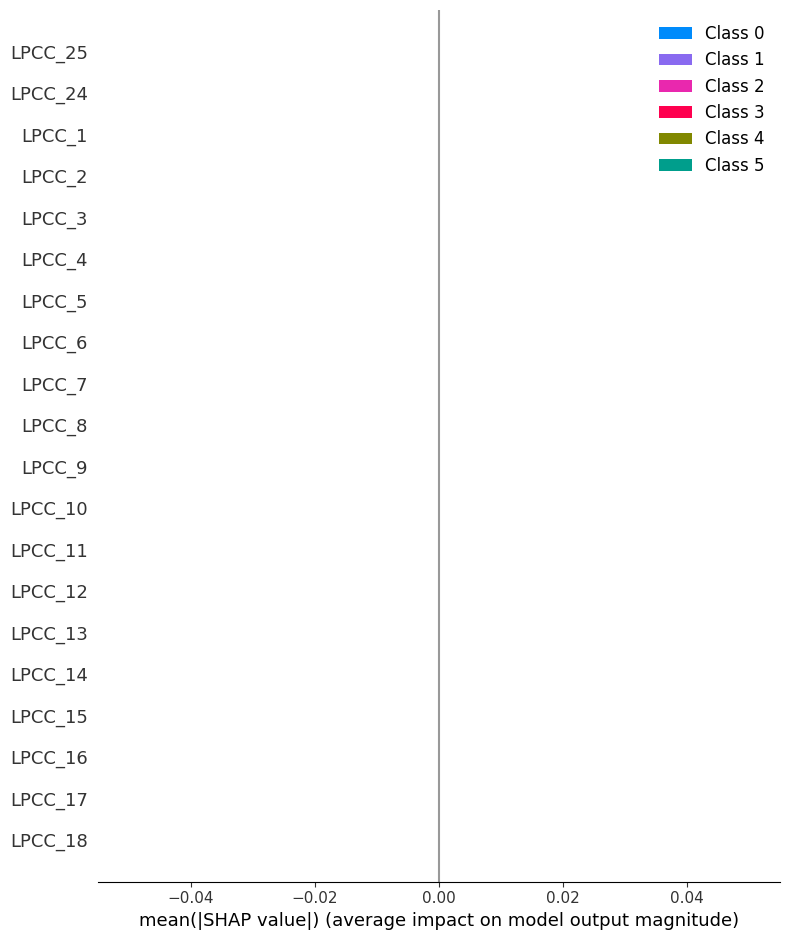

In [18]:
import shap

# Explain the model's predictions using SHAP by computing SHAP values
explainer = shap.Explainer(model_lpcc)
shap_values = explainer.shap_values(train_feat_df_lpcc)

#Convert the shap values for each class to a single list
shap_as_list=[]
for i in range(6):
    shap_as_list.append(shap_values[:,:,i])

# Plot the SHAP values
shap.summary_plot(shap_as_list, train_feat_df_lpcc, plot_type="bar")